In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [3]:
#read data from the spreedsheet
data = pd.read_excel('Week2_challenge_data_source.xlsx', sheet_name='Sheet1')
descriptions = pd.read_excel('Field Descriptions.xlsx', sheet_name='Sheet1')

**User Overview analysis**


In [4]:
#get info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
#get the dimensions of the dataset
data.shape

(150001, 55)

In [6]:
#get the datatypes of the variables
data.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float


**For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance:** 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [7]:
#filter top 10 handsets used by customers
data["Handset Type"].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [8]:
#filter top 3 handset manufacturers
data["Handset Manufacturer"].value_counts().head(3)

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [9]:
#top 5 handsets of Apple
apple_handsets = data[data["Handset Manufacturer"] == "Apple"]
apple_handsets["Handset Type"].value_counts().head(5)

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [10]:
#top 5 handsets of Samsung
samsung_handsets = data[data["Handset Manufacturer"] == "Samsung"]
samsung_handsets["Handset Type"].value_counts().head(5)

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [11]:
#top 5 handsets of Huawei
huawei_handsets = data[data["Handset Manufacturer"] == "Huawei"]
huawei_handsets["Handset Type"].value_counts().head(5)

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

The marketing team should focus on users with handsets from these top three manufacturers: **Apple, Samsung and Huawei.**

******************************



**Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.** 
- Aggregate per user the following information in the column  - (Jupyter notebook):
   - number of xDR sessions
   - Session duration
   - the total download (DL) and upload (UL) data
   - the total data volume (in Bytes) during this session for each application


In [12]:
#aggregate using MSISDN
sessions = data[["MSISDN/Number","Bearer Id","IMEI"]]
session_count = sessions.groupby(["MSISDN/Number"]).count()
session_count

,Bearer Id,IMEI
MSISDN/Number,,
3.360100e+10,1,1
3.360100e+10,1,1
3.360100e+10,1,1
3.360101e+10,1,1
3.360101e+10,2,2
...,...,...
3.379000e+10,1,1
3.379000e+10,1,1
3.197021e+12,1,1


In [13]:
session_count.describe()

,Bearer Id,IMEI
count,106856.000000,106856.000000
mean,1.393792,1.393792
std,0.806022,0.806022
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,18.000000,18.000000


In [14]:
data_usage = data[["MSISDN/Number","Dur. (ms).1", "Total DL (Bytes)", "Total UL (Bytes)"]]
data_usage.groupby(["MSISDN/Number"]).agg('sum')


,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
3.360100e+10,116720140.0,8.426375e+08,36053108.0
3.360100e+10,181230963.0,1.207552e+08,36104459.0
3.360100e+10,134969374.0,5.566597e+08,39306820.0
3.360101e+10,49878024.0,4.019932e+08,20327526.0
3.360101e+10,37104453.0,1.363130e+09,94280527.0
...,...,...,...
3.379000e+10,8810688.0,6.879252e+08,26716429.0
3.379000e+10,140988659.0,4.445751e+08,35732243.0
3.197021e+12,877385325.0,1.948281e+08,37295915.0


In [15]:
#add total data for each applications
data["Total Google"] = data["Google DL (Bytes)"] + data["Google UL (Bytes)"]
data["Total Youtube"] = data["Youtube DL (Bytes)"] + data["Youtube UL (Bytes)"]
data["Total Netflix"] = data["Netflix DL (Bytes)"] + data["Netflix UL (Bytes)"]
data["Total Email"] = data["Email DL (Bytes)"] + data["Email UL (Bytes)"]
data["Total Gaming"] = data["Gaming DL (Bytes)"] + data["Gaming UL (Bytes)"]
data["Total Social Media"] = data["Social Media DL (Bytes)"] + data["Social Media UL (Bytes)"]
data["Total Other"] = data["Other DL (Bytes)"] + data["Other UL (Bytes)"]


app_data = data[["Bearer Id","MSISDN/Number","Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
app_data.groupby(["MSISDN/Number"]).agg('sum')

,Total Google,Total Youtube,Total Netflix,Total Email,Total Gaming,Total Social Media,Total Other
MSISDN/Number,,,,,,,
3.360100e+10,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0
3.360100e+10,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0
3.360100e+10,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0
3.360101e+10,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0
3.360101e+10,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0
3.379000e+10,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0
3.197021e+12,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0



**Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.**
  

In [16]:
#check for null values
data[["Dur. (ms).1","Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube", "Total Netflix", "Total Gaming"]].isna().sum().head(60)

Dur. (ms).1           1
Total DL (Bytes)      1
Total UL (Bytes)      1
Total Social Media    0
Total Google          0
Total Email           0
Total Youtube         0
Total Netflix         0
Total Gaming          0
dtype: int64

In [17]:
#fill null values with the mean of the column
data["Total DL (Bytes)"].fillna(data["Total DL (Bytes)"].mean(), inplace = True)
data["Total UL (Bytes)"].fillna(data["Total UL (Bytes)"].mean(), inplace = True)
data["Dur. (ms).1"].fillna(data["Dur. (ms).1"].mean(), inplace = True)

In [18]:
data[["Dur. (ms).1", "Total DL (Bytes)","Total UL (Bytes)", "Total Social Media", "Total Google", "Total Email", "Total Youtube", "Total Netflix", "Total Gaming"]].describe()

,Dur. (ms).1,Total DL (Bytes),Total UL (Bytes),Total Social Media,Total Google,Total Email,Total Youtube,Total Netflix,Total Gaming
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046091e+08,4.546434e+08,4.112121e+07,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08
std,8.103734e+07,2.441421e+08,1.127635e+07,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08
min,7.142988e+06,7.114041e+06,2.866892e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,5.744206e+07,2.431072e+08,3.322203e+07,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08
50%,8.639998e+07,4.558409e+08,4.114324e+07,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08
75%,1.324307e+08,6.657051e+08,4.903424e+07,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08
max,1.859336e+09,9.029696e+08,7.833131e+07,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08


In [19]:
#check for skewness
data.skew()

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < UL TP < 50 Kbps (%)                10.943888
50 Kbps < 

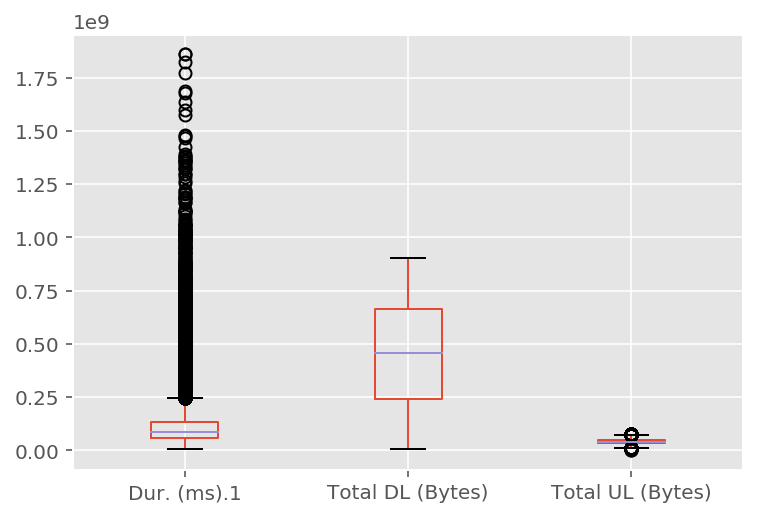

In [20]:
#look for the outliers
data.boxplot(column=['Dur. (ms).1', "Total DL (Bytes)","Total UL (Bytes)"])

Text(0.5, 1.0, 'Duration Histogram')

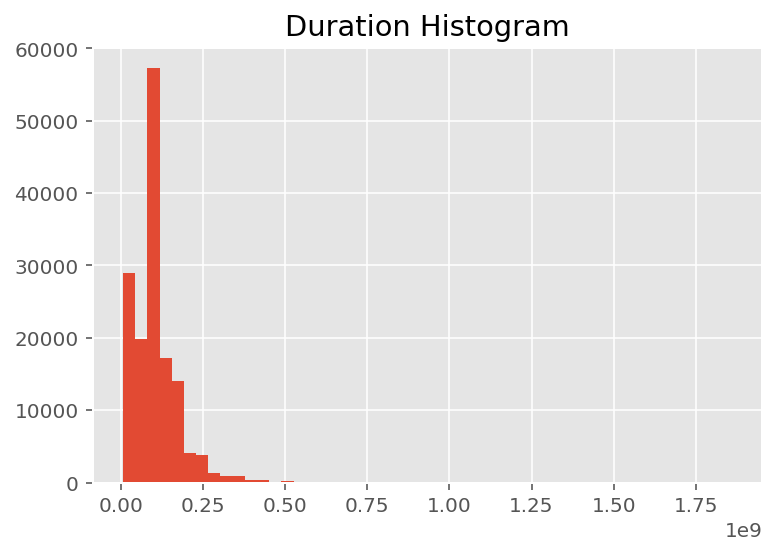

In [21]:
#plotting variable distributions
data["Dur. (ms).1"].hist(bins = 50)
plt.title("Duration Histogram")


Text(0.5, 1.0, 'Total Download Histogram')

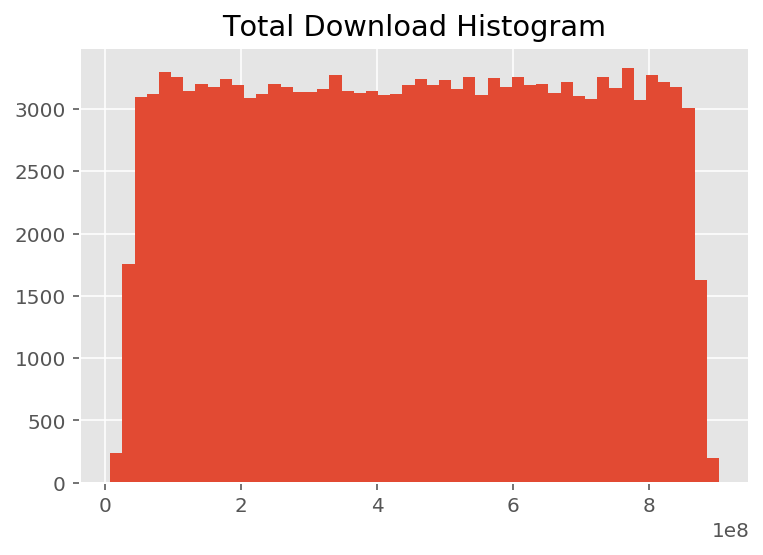

In [22]:
data["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")


Text(0.5, 1.0, 'Total Upload Histogram')

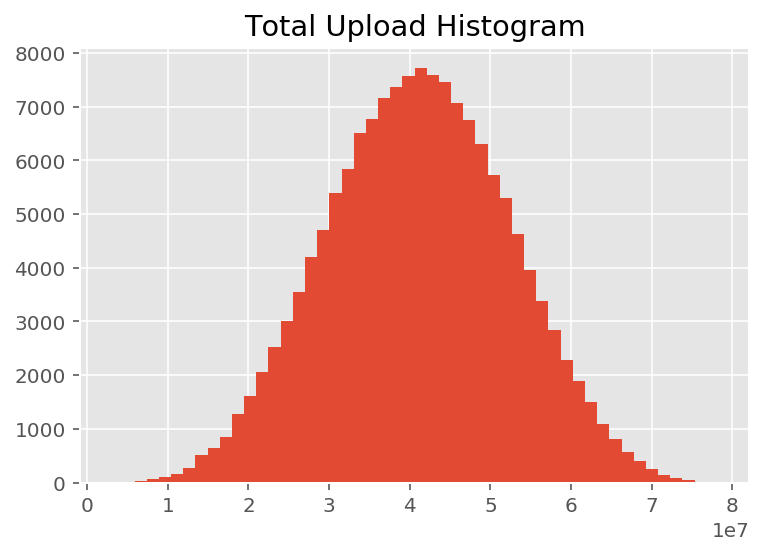

In [23]:
data["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")


Text(0.5, 1.0, 'Total Social Media Data Histogram')

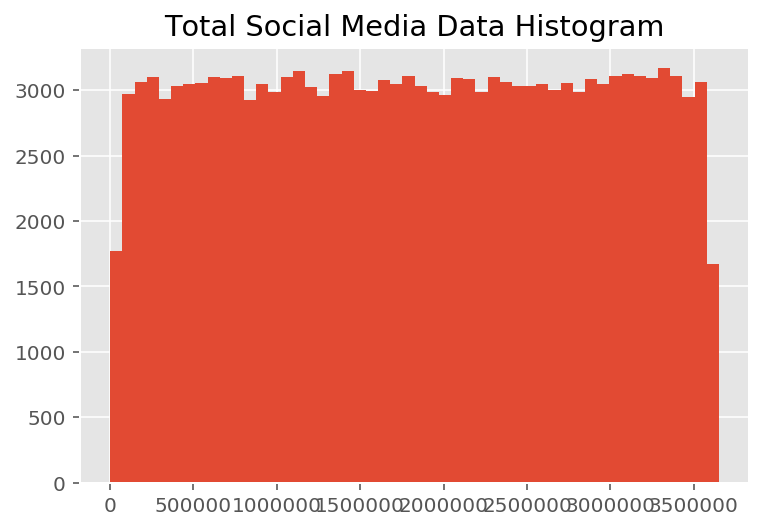

In [24]:
data["Total Social Media"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")


Text(0.5, 1.0, 'Total Google Data Histogram')

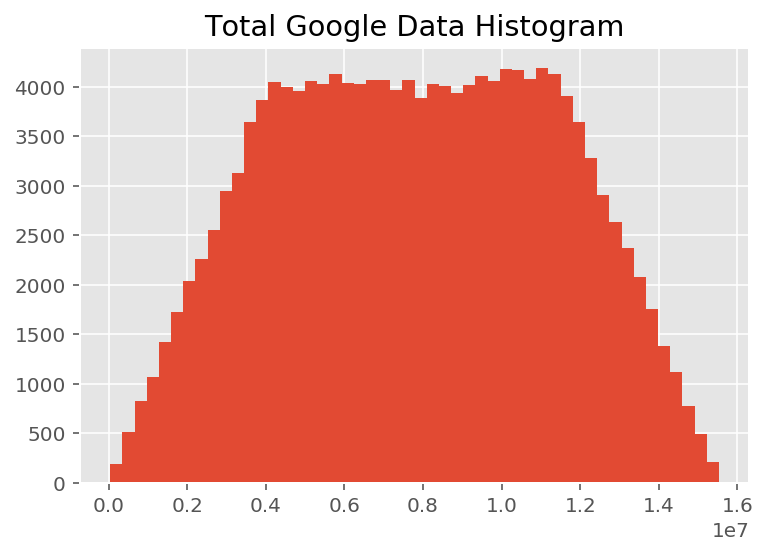

In [25]:
data["Total Google"].hist(bins = 50)
plt.title("Total Google Data Histogram")


Text(0.5, 1.0, 'Total Email Data Histogram')

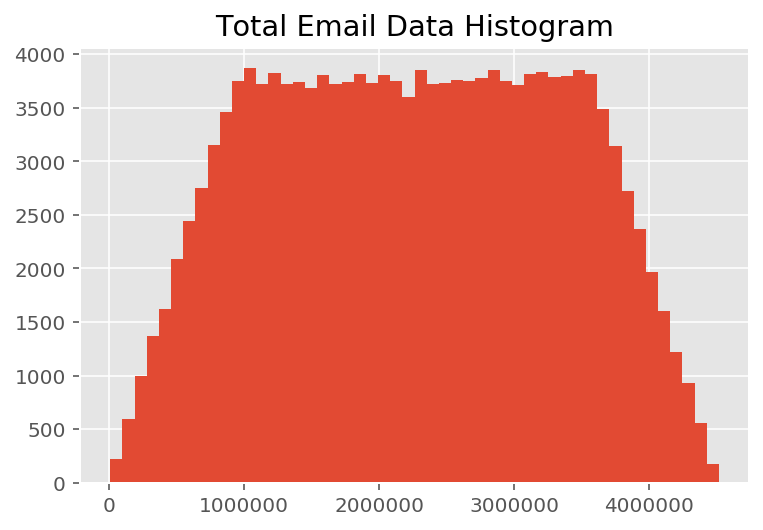

In [26]:
data["Total Email"].hist(bins = 50)
plt.title("Total Email Data Histogram")


Text(0.5, 1.0, 'Total Youtube Data Histogram')

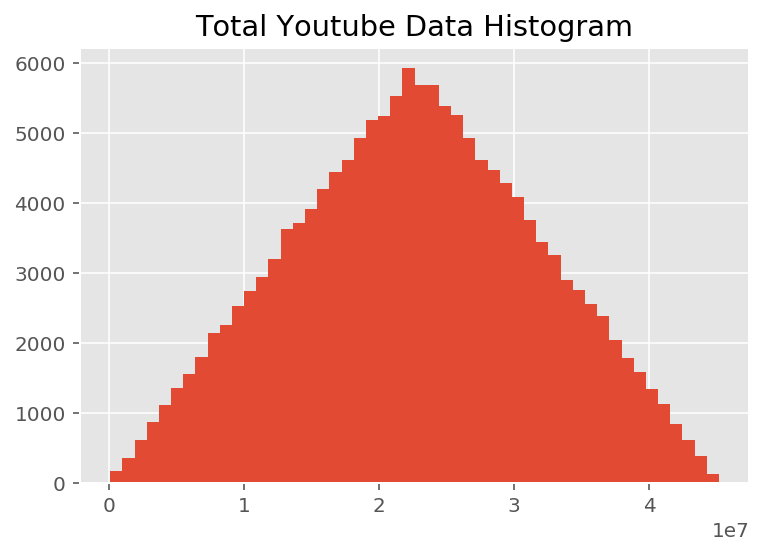

In [27]:
data["Total Youtube"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")


Text(0.5, 1.0, 'Total Netflix Data Histogram')

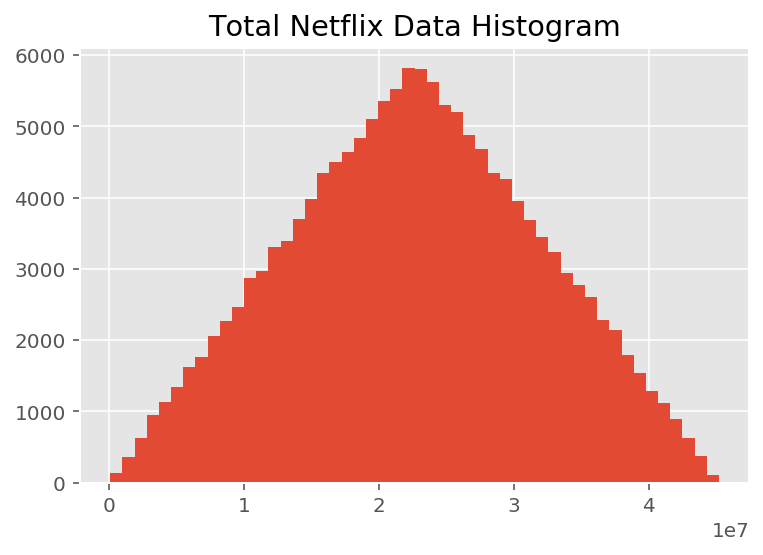

In [28]:
data["Total Netflix"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")


Text(0.5, 1.0, 'Total Gaming Data Histogram')

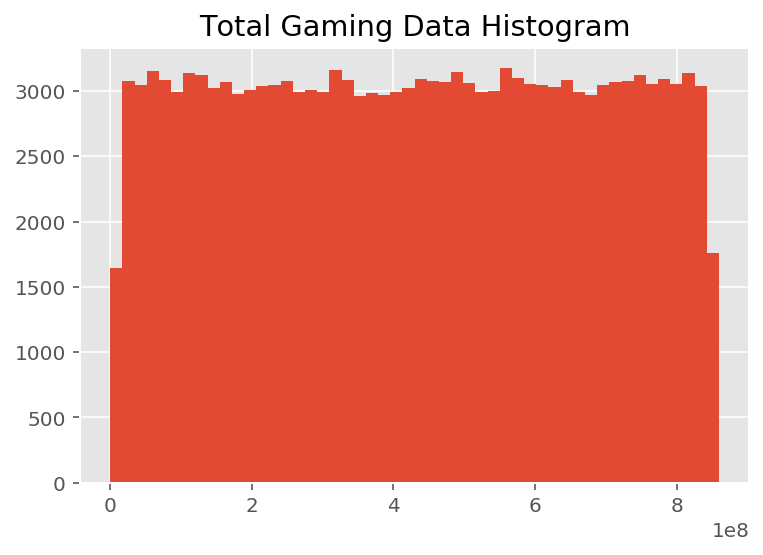

In [29]:
data["Total Gaming"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")


Text(0.5, 1.0, 'App Data usage')

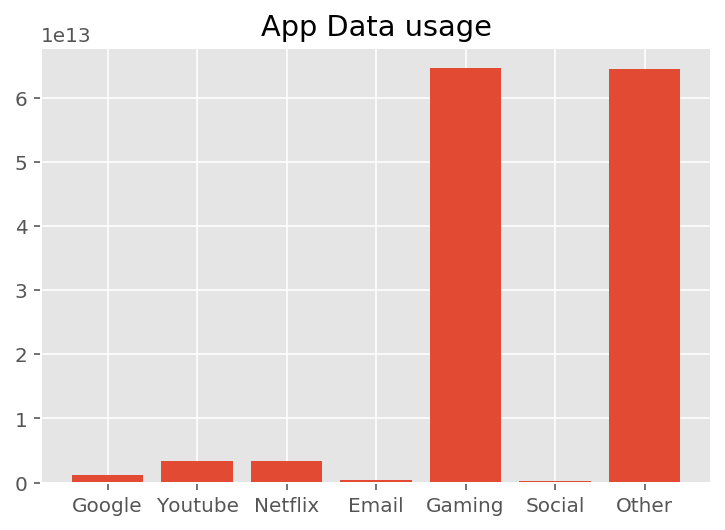

In [30]:
#plotting app data usage comparisons
total_usage = app_data[["Total Google", "Total Youtube", "Total Netflix", "Total Email", "Total Gaming", "Total Social Media", "Total Other"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")


**Variable transformations** – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. - (jupyter notebook + slide )

In [31]:
#group users into top 5 deciles 
users = data.groupby(["MSISDN/Number"]).agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total UL (Bytes)':'sum', 'Total DL (Bytes)':'sum'}).sort_values(by="Dur. (ms).1", ascending = False)
first_decile = users.iloc[0:10,:]
second_decile = users.iloc[10:20,:]
third_decile = users.iloc[20:30,:]
fourth_decile = users.iloc[30:40,:]
fifth_decile = users.iloc[40:50,:]

#print total data of each decile group
print("Total data of the first decile is: ",first_decile["Total DL (Bytes)"].sum() + first_decile["Total UL (Bytes)"].sum())
print("Total data of the second decile is: ",second_decile["Total DL (Bytes)"].sum() + second_decile["Total UL (Bytes)"].sum())
print("Total data of the third decile is: ",third_decile["Total DL (Bytes)"].sum() + third_decile["Total UL (Bytes)"].sum())
print("Total data of the fourth decile is: ",fourth_decile["Total DL (Bytes)"].sum() + fourth_decile["Total UL (Bytes)"].sum())
print("Total data of the fifth decile is: ",fifth_decile["Total DL (Bytes)"].sum() + fifth_decile["Total UL (Bytes)"].sum())

Total data of the first decile is:  63841375307.0
Total data of the second decile is:  49147663767.0
Total data of the third decile is:  44907065117.0
Total data of the fourth decile is:  31702135331.0
Total data of the fifth decile is:  42662577862.0


**Correlation Analysis** – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data - (jupyter notebook + slide )

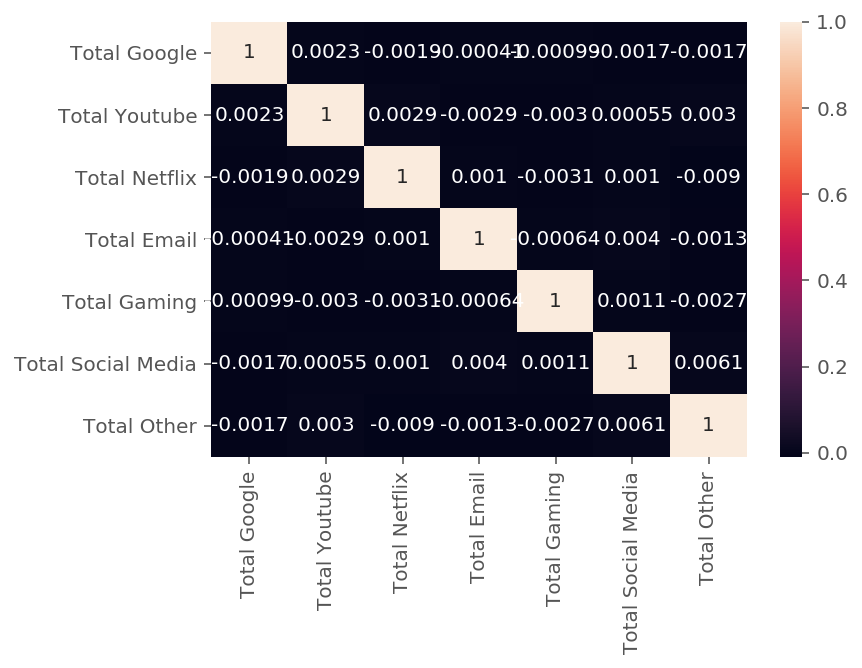

In [32]:
#get correlation of the variables
correlation = total_usage.corr()
sns.heatmap(correlation, annot=True)
plt.show()


**Dimensionality Reduction** – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). - (jupyter notebook + slide )

In [33]:
#use PCA to get 4 principal components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(total_usage)
principal_Df = pd.DataFrame(data = principal_components
             , columns = ['pc_1', 'pc_2', 'pc_3', 'pc_4'])
principal_Df

,pc_1,pc_2,pc_3,pc_4
0,4.258971e+07,2.812616e+08,6.389885e+06,-1.105622e+06
1,-1.291107e+08,-1.681006e+08,-1.981942e+07,7.467102e+06
2,1.827673e+08,8.334847e+07,-7.075450e+06,9.459990e+06
3,-2.404206e+08,-4.440487e+08,-9.685271e+05,1.570863e+07
4,-4.746228e+07,-1.619364e+08,-1.756936e+06,1.249780e+07
...,...,...,...,...
149996,-2.426090e+08,3.500267e+08,-1.542786e+07,-3.146633e+06
149997,-8.930416e+07,-3.375213e+08,-1.521201e+07,-9.894036e+06
149998,-2.314923e+08,2.307568e+08,5.549034e+06,5.651687e+06
149999,2.052856e+08,-3.363079e+08,8.035739e+06,-1.613447e+06


******************************


**Task 2**

**Task 2.1 - Based on the above:**
- Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric - (jupyter notebook + slide for top 10)
- Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. -  (jupyter notebook)


In [34]:
#adding total traffic to the data
data["Total Traffic"] = data["Total UL (Bytes)"] + data["Total DL (Bytes)"]
engagement = data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum', 'Total Traffic':'sum'})


print("Top ten frequent users: \n", engagement.sort_values(by="Bearer Id", ascending=False).head(10))
print("\n\nTop ten users with the longest sessions: \n", engagement.sort_values(by="Dur. (ms).1", ascending=False).head(10))
print("\n\nTop ten users with the most data usage: \n", engagement.sort_values(by="Total Traffic", ascending=False).head(10))


Top ten frequent users: 
                Bearer Id   Dur. (ms).1  Total Traffic
MSISDN/Number                                        
3.362632e+10          18  8.791937e+09   7.971167e+09
3.362578e+10          17  1.855376e+10   8.499621e+09
3.361489e+10          17  9.966906e+09   8.846226e+09
3.365973e+10          16  4.035436e+09   7.705863e+09
3.376054e+10          15  9.279442e+09   8.514774e+09
3.367588e+10          15  4.865954e+09   7.891111e+09
3.366716e+10          13  8.744922e+09   5.618394e+09
3.362708e+10          12  4.703519e+09   5.754731e+09
3.360452e+10          12  5.207995e+09   5.487855e+09
3.376041e+10          12  5.321674e+09   7.132371e+09


Top ten users with the longest sessions: 
                Bearer Id   Dur. (ms).1  Total Traffic
MSISDN/Number                                        
3.362578e+10          17  1.855376e+10   8.499621e+09
3.361489e+10          17  9.966906e+09   8.846226e+09
3.376054e+10          15  9.279442e+09   8.514774e+09
3.362632e+1

In [35]:
engagement.describe()

,Bearer Id,Dur. (ms).1,Total Traffic
count,106856.000000,1.068560e+05,1.068560e+05
mean,1.393792,1.461679e+08,6.909621e+08
std,0.806022,1.863590e+08,4.910559e+08
min,1.000000,7.142988e+06,3.324901e+07
25%,1.000000,7.130834e+07,3.585499e+08
50%,1.000000,1.027402e+08,6.179231e+08
75%,2.000000,1.728000e+08,8.574351e+08
max,18.000000,1.855376e+10,8.846226e+09


In [36]:
# normalizing the engagement dataframe

norm_engagement = (engagement - engagement.mean())/engagement.std()
norm_engagement.describe()


,Bearer Id,Dur. (ms).1,Total Traffic
count,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.452218e-14,-4.596491e-18,-8.039704e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.885619e-01,-7.460062e-01,-1.339385e+00
25%,-4.885619e-01,-4.016956e-01,-6.769335e-01
50%,-4.885619e-01,-2.330325e-01,-1.487386e-01
75%,7.520990e-01,1.429075e-01,3.390104e-01
max,2.060267e+01,9.877495e+01,1.660761e+01


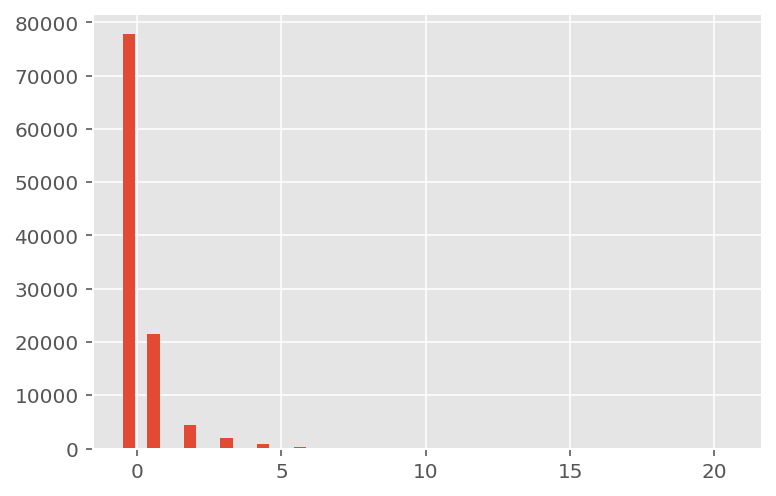

In [37]:
#chek the normalized variables
norm_engagement["Bearer Id"].hist(bins=50)

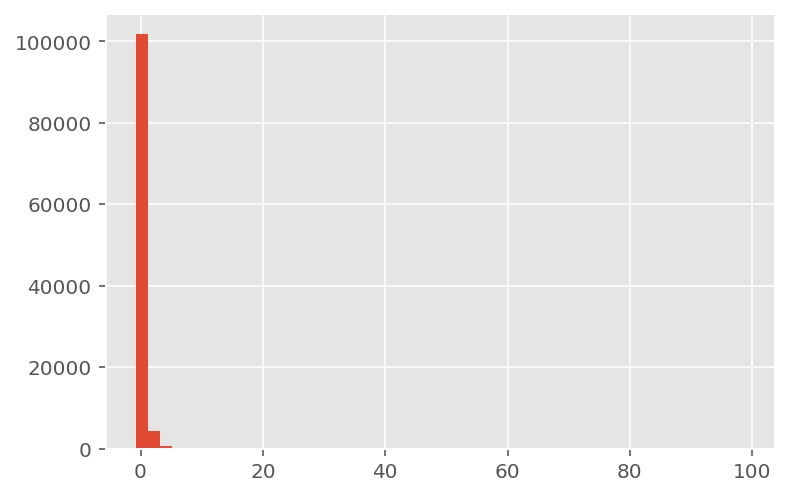

In [38]:
norm_engagement["Dur. (ms).1"].hist(bins=50)

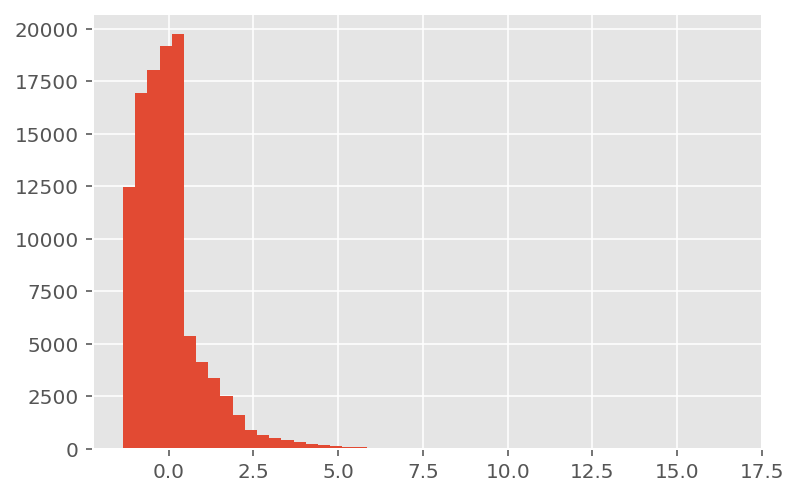

In [39]:
norm_engagement["Total Traffic"].hist(bins=50)

In [40]:
#perform kmeans clustering with k=3
kmeans_3k = KMeans(n_clusters = 3)
kmeans_3k.fit(norm_engagement)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
#assign cluster to each user 
engagement_centroids = kmeans_3k.cluster_centers_
cluster_3k = kmeans_3k.predict(norm_engagement)
norm_engagement['cluster_3k'] = cluster_3k


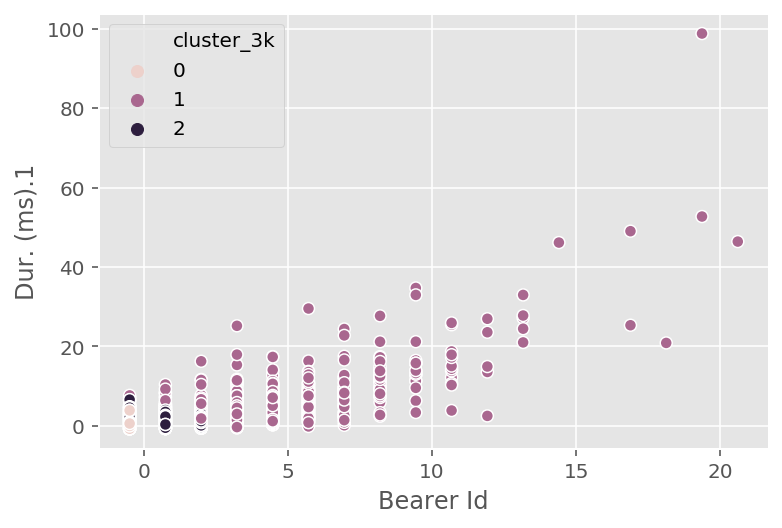

In [42]:
#plotting clusters
sns.scatterplot(x=norm_engagement.iloc[:,0], y=norm_engagement.iloc[:,1], hue=norm_engagement["cluster_3k"], legend="full")


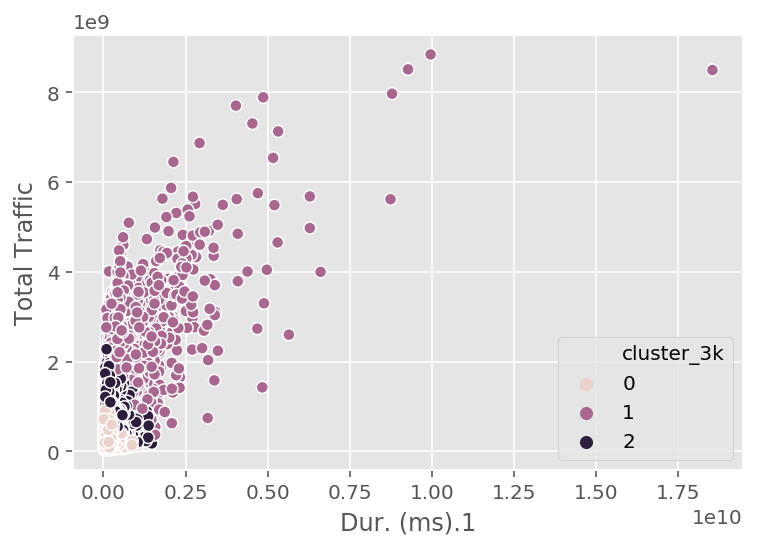

In [43]:
engagement["cluster_3k"]=cluster_3k
sns.scatterplot(x=engagement["Dur. (ms).1"], y=engagement["Total Traffic"], hue=engagement["cluster_3k"], legend="full")


- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.  - (jupyter notebook + slide)


In [44]:
#number of users in each cluster
print("C.   Total Users")
engagement["cluster_3k"].value_counts()

C.   Total Users


0    79797
2    23479
1     3580
Name: cluster_3k, dtype: int64

In [45]:
engagement[engagement.cluster_3k == 0].describe()

,Bearer Id,Dur. (ms).1,Total Traffic,cluster_3k
count,79797.000000,7.979700e+04,7.979700e+04,79797.0
mean,1.027420,1.030910e+08,4.948935e+08,0.0
std,0.163304,6.944087e+07,2.417536e+08,0.0
min,1.000000,7.142988e+06,3.324901e+07,0.0
25%,1.000000,5.432398e+07,2.889828e+08,0.0
50%,1.000000,8.640003e+07,4.940346e+08,0.0
75%,1.000000,1.388006e+08,7.014406e+08,0.0
max,2.000000,1.035262e+09,9.507607e+08,0.0


In [46]:
engagement[engagement.cluster_3k == 1].describe()

,Bearer Id,Dur. (ms).1,Total Traffic,cluster_3k
count,3580.000000,3.580000e+03,3.580000e+03,3580.0
mean,4.400559,6.558934e+08,2.286307e+09,1.0
std,1.236223,6.982421e+08,7.177500e+08,0.0
min,1.000000,6.659556e+07,3.704210e+08,1.0
25%,4.000000,3.456025e+08,1.836935e+09,1.0
50%,4.000000,4.320014e+08,2.187215e+09,1.0
75%,5.000000,6.865275e+08,2.611045e+09,1.0
max,18.000000,1.855376e+10,8.846226e+09,1.0


In [47]:
engagement[engagement.cluster_3k == 2].describe()

,Bearer Id,Dur. (ms).1,Total Traffic,cluster_3k
count,23479.000000,2.347900e+04,2.347900e+04,23479.0
mean,2.180502,2.148502e+08,1.114079e+09,2.0
std,0.423711,1.292742e+08,3.500311e+08,0.0
min,1.000000,1.823580e+07,1.770069e+08,2.0
25%,2.000000,1.234797e+08,8.552462e+08,2.0
50%,2.000000,1.874311e+08,1.084417e+09,2.0
75%,2.000000,2.720073e+08,1.351210e+09,2.0
max,4.000000,1.480875e+09,2.512802e+09,2.0


- Aggregate user total traffic per application and derive the top 10 most engaged users per application -  (jupyter notebook + slide)
- Plot the top 3 most used applications.  - (jupyter notebook + slide)


In [48]:
app_total = data.groupby('MSISDN/Number').agg({ 'Total Traffic':'sum',"Total Google":'sum', "Total Youtube":'sum', "Total Netflix":'sum', "Total Email":'sum', "Total Gaming":'sum', "Total Social Media":'sum', "Total Other":'sum'})


for coll in app_total:
    print("\n\nTop ten ",coll," users: \n", app_total.sort_values(by=coll, ascending=False)[coll].head(10))



Top ten  Total Traffic  users: 
 MSISDN/Number
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
3.369879e+10    6.540899e+09
Name: Total Traffic, dtype: float64


Top ten  Total Google  users: 
 MSISDN/Number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369876e+10     91935151.0
Name: Total Google, dtype: float64


Top ten  Total Youtube  users: 
 MSISDN/Number
3.362578e+10    452958769.0
3.376054e+10    396289198.0
3.361489e+10    394370218.0
3.362632e+10    374483047.0
3.367588e+10    317410572.0
3.366716e+10    315231310.0
3.362708e+10    308790774.0
3.376041e+10    3

In [49]:
#print top 3 used apps
top_used = pd.DataFrame(columns=["Name", "Total Data"])
for col in app_total:
    top_used.loc[len(top_used)] = [col, app_total[col].sum()]

top_three = top_used.sort_values(by = "Total Data", ascending = False)[1:4]
print("Top three used applications: ")
top_three

Top three used applications: 


,Name,Total Data
5,Total Gaming,6.408892e+13
7,Total Other,6.395425e+13
2,Total Youtube,3.372204e+12


Text(0.5, 1.0, 'Top 3 most used apps')

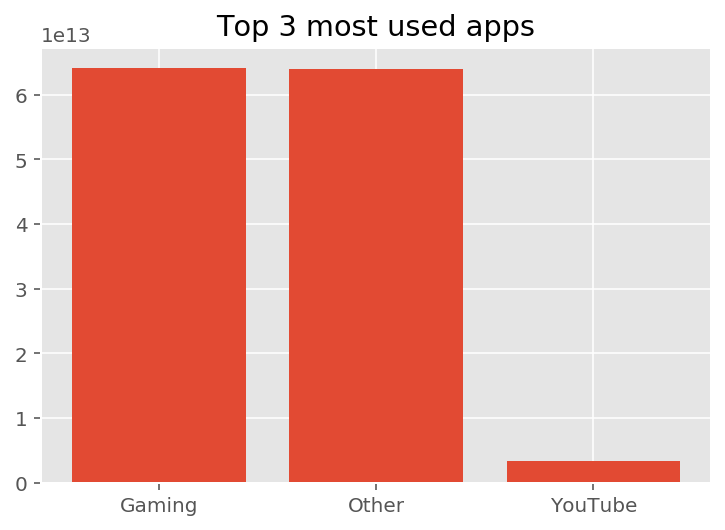

In [50]:
#plot the top 3 apps
ind = np.arange(3)
width =0.8

plt.xticks(ind , ("Gaming", "Other", "YouTube"))
plt.bar(ind, top_three["Total Data"], width, label = "Total Usage")
plt.title("Top 3 most used apps")

- Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
    - What is the optimized value of k?  - (slide)
    - Interpret your findings. - (slide)


In [51]:
#calculating inertia for k values 1 -19
inertia = []
for cluster in range(1,20):
    km = KMeans(n_jobs = -1, n_clusters = cluster)
    km.fit(norm_engagement)
    inertia.append(km.inertia_)


Text(0, 0.5, 'Inertia')

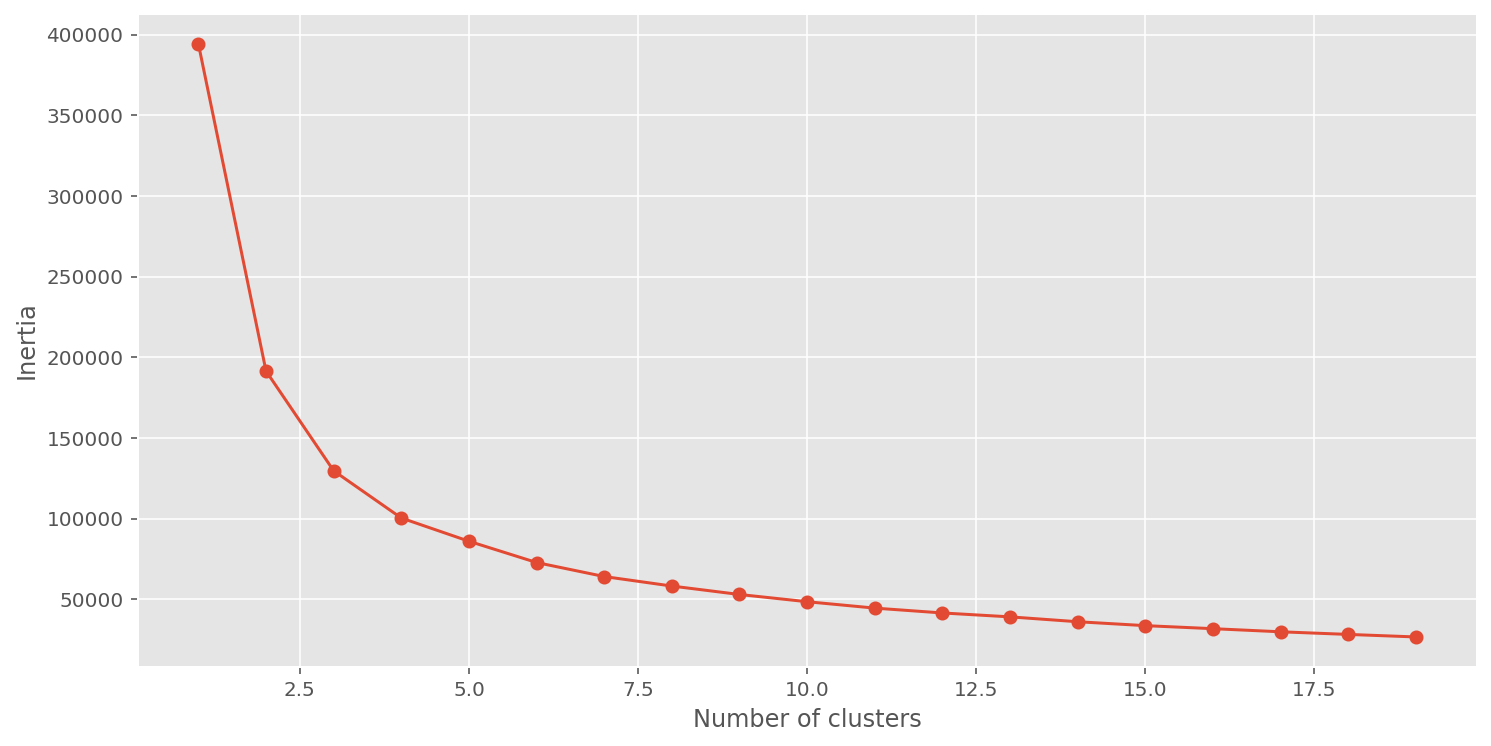

In [52]:
#plotting k Vs inertia 
frame = pd.DataFrame({'k':range(1,20), 'inertia':inertia})

plt.figure(figsize=(12,6))
plt.plot(frame['k'], frame['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

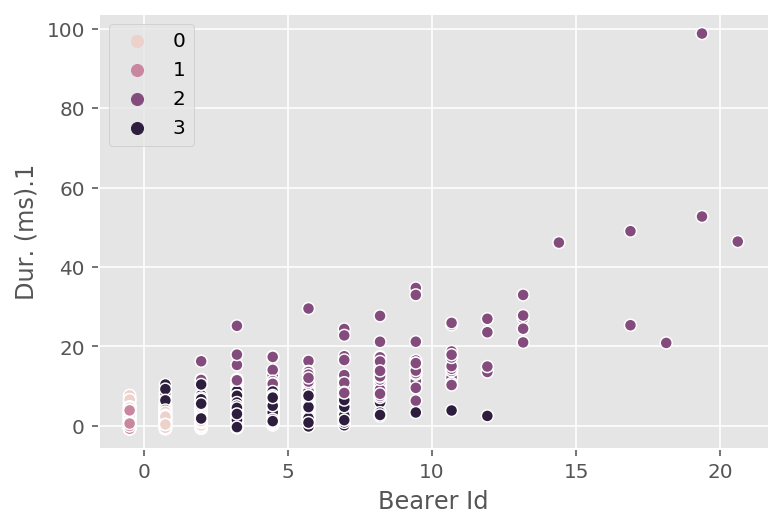

In [53]:
#taking k = 4 and clustering
kmeans_4k = KMeans(n_clusters=4)
kmeans_4k.fit(norm_engagement)

sns.scatterplot(x=norm_engagement.iloc[:,0], y=norm_engagement.iloc[:,1], hue=kmeans_4k.labels_, legend="full")

******************************

**Task 3**

Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable) -(jupyter notebook):
   - Average TCP retransmission
   - Average RTT
   - Handset type
   - Average throughput


In [54]:
#adding total network parameters
data["Total RTT"] = data["Avg RTT DL (ms)"] + data["Avg RTT UL (ms)"]
data["Total TP"] = data["Avg Bearer TP DL (kbps)"] + data["Avg Bearer TP UL (kbps)"]
data["Total TCP"] = data["TCP DL Retrans. Vol (Bytes)"] + data["TCP UL Retrans. Vol (Bytes)"]
experience = data.groupby('MSISDN/Number').agg({'Total TCP':'sum', 'Total RTT':'sum', 'Total TP':'sum', 'Handset Type':'count'})


In [55]:
experience

,Total TCP,Total RTT,Total TP,Handset Type
MSISDN/Number,,,,
3.360100e+10,0.0,46.0,76.0,1
3.360100e+10,0.0,31.0,99.0,1
3.360100e+10,0.0,0.0,97.0,1
3.360101e+10,0.0,84.0,248.0,1
3.360101e+10,9370832.0,119.0,56844.0,2
...,...,...,...,...
3.379000e+10,218045.0,52.0,10365.0,1
3.379000e+10,0.0,40.0,116.0,1
3.197021e+12,0.0,0.0,1.0,1



**Task 3.2** - Compute & list 10 of the top, bottom and most frequent - (jupyter notebook + slide ):
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.

In [56]:
print("\n\nTop ten TCP values: \n", experience.sort_values(by="Total TCP", ascending=False).head(10))
print("\n\nTop ten RTT values: \n", experience.sort_values(by="Total RTT", ascending=False).head(10))
print("\n\nTop ten Throughput values: \n", experience.sort_values(by="Total TP", ascending=False).head(10))



Top ten TCP values: 
                   Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                                 
3.366773e+10   8.354209e+09      703.0  379713.0             5
3.365908e+10   7.941860e+09      396.0  210259.0             3
3.376128e+10   6.043978e+09      351.0  144570.0             2
3.376264e+10   5.879989e+09     2860.0  549661.0             5
3.365066e+10   5.593366e+09     1543.0  259548.0             5
3.366318e+10   5.566929e+09      583.0  127603.0             4
3.376357e+10   5.179459e+09      479.0  120288.0             2
3.366905e+10   5.174215e+09      321.0  142042.0             4
3.365864e+10   5.165857e+09      171.0  105875.0             2
3.376386e+10   5.095685e+09     1184.0  312289.0             6


Top ten RTT values: 
                Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                              
3.366232e+10         0.0    96924.0       3.0             1
3.366087e+10    

In [57]:
print("\n\nBottom ten TCP values: \n", experience.sort_values(by="Total TCP", ascending=True).head(10))
print("\n\nBottom ten RTT values: \n", experience.sort_values(by="Total RTT", ascending=True).head(10))
print("\n\nBottom ten Throughput values: \n", experience.sort_values(by="Total TP", ascending=True).head(10))



Bottom ten TCP values: 
                Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                              
3.360100e+10         0.0       46.0      76.0             1
3.366674e+10         0.0       81.0     188.0             2
3.366674e+10         0.0      122.0     157.0             2
3.366674e+10         0.0        0.0      79.0             1
3.366674e+10         0.0       40.0      42.0             1
3.366674e+10         0.0       58.0   17890.0             1
3.366674e+10         0.0       33.0      54.0             1
3.366674e+10         0.0        0.0      99.0             1
3.366674e+10         0.0      114.0     816.0             1
3.366674e+10         0.0       28.0      84.0             1


Bottom ten RTT values: 
                Total TCP  Total RTT  Total TP  Handset Type
MSISDN/Number                                              
8.823971e+14         0.0        0.0       2.0             1
3.367752e+10         0.0        0.0     161.0 

In [58]:
top10_tcp = experience.groupby('Total TCP').size().sort_values(ascending = False).head(10)
top10_tcp

top10_rtt = experience.groupby('Total RTT').size().sort_values(ascending = False).head(10)
top10_rtt

top10_tp = experience.groupby('Total TP').size().sort_values(ascending = False).head(10)
top10_tp


print("\n\nTen most frequent TCP values: \n", top10_tcp)
print("\n\nTen most frequent RTT values: \n", top10_rtt)
print("\n\nTen most frequent Throughput values: \n", top10_tp)



Ten most frequent TCP values: 
 Total TCP
0.0        67565
5320.0        21
2660.0        21
6650.0        18
3990.0        17
7980.0        13
1873.0         9
11970.0        8
2648.0         8
10640.0        7
dtype: int64


Ten most frequent RTT values: 
 Total RTT
0.0     18546
29.0     2778
39.0     2245
38.0     1541
30.0     1478
40.0     1466
28.0     1373
49.0     1268
31.0     1096
41.0     1095
dtype: int64


Ten most frequent Throughput values: 
 Total TP
15.0    2685
63.0    2072
97.0    1023
90.0    1005
98.0     971
96.0     866
99.0     853
89.0     817
95.0     798
91.0     793
dtype: int64



**Task 3.3** - Compute & report - (jupyter notebook + slide ):
- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.

In [59]:
handset = data.groupby('Handset Type').agg({'Total TCP':'sum', 'Total RTT':'sum', 'Total TP':'sum'})

print("\n\nThroughput\n",handset.sort_values(by="Total TP", ascending = False).head(10))
print("\n\nTCP Retransmission\n",handset.sort_values(by="Total TCP", ascending = False).head(10))



Throughput
                                  Total TCP  Total RTT     Total TP
Handset Type                                                      
Huawei B528S-23A              1.042623e+12  2984690.0  833510472.0
undefined                     7.873569e+09   550453.0   90414733.0
Apple iPhone 7 (A1778)        8.214772e+09   699835.0   77183403.0
Apple iPhone 6S (A1688)       1.112880e+10   725131.0   74298231.0
Apple iPhone 6 (A1586)        1.022702e+10   902390.0   68735008.0
Huawei E5180                  6.022787e+10   342228.0   64368628.0
Samsung Galaxy S8 (Sm-G950F)  6.445683e+09   231572.0   63224397.0
Apple iPhone Xr (A2105)       8.891681e+09   304898.0   62436108.0
Apple iPhone 8 (A1905)        5.501643e+09   504114.0   58106552.0
Apple iPhone X (A1901)        7.856175e+09   330971.0   57047497.0


TCP Retransmission
                             Total TCP  Total RTT     Total TP
Handset Type                                                 
Huawei B528S-23A         1.042623e+1


**Task 3.4** - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. - (jupyter notebook + slide )


In [60]:
#normalizing the experience dataframe
norm_experience = (experience - experience.mean())/experience.std()
norm_experience

,Total TCP,Total RTT,Total TP,Handset Type
MSISDN/Number,,,,
3.360100e+10,-0.079607,-0.144258,-0.492745,-0.488562
3.360100e+10,-0.079607,-0.166714,-0.492203,-0.488562
3.360100e+10,-0.079607,-0.213125,-0.492250,-0.488562
3.360101e+10,-0.079607,-0.087367,-0.488692,-0.488562
3.360101e+10,-0.017705,-0.034968,0.844978,0.752099
...,...,...,...,...
3.379000e+10,-0.078167,-0.135275,-0.250287,-0.488562
3.379000e+10,-0.079607,-0.153240,-0.491802,-0.488562
3.197021e+12,-0.079607,-0.213125,-0.494512,-0.488562


In [61]:
#performing kmeans with k=3
kmeans_exp = KMeans(n_clusters=3)
kmeans_exp.fit(norm_experience)
cluster_exp = kmeans_exp.predict(norm_experience)
experience_centroids = kmeans_exp.cluster_centers_


In [62]:
#assign the clusters
norm_experience['cluster_exp'] = cluster_exp
norm_experience['cluster_exp'].value_counts()

0    97168
1     9461
2      227
Name: cluster_exp, dtype: int64

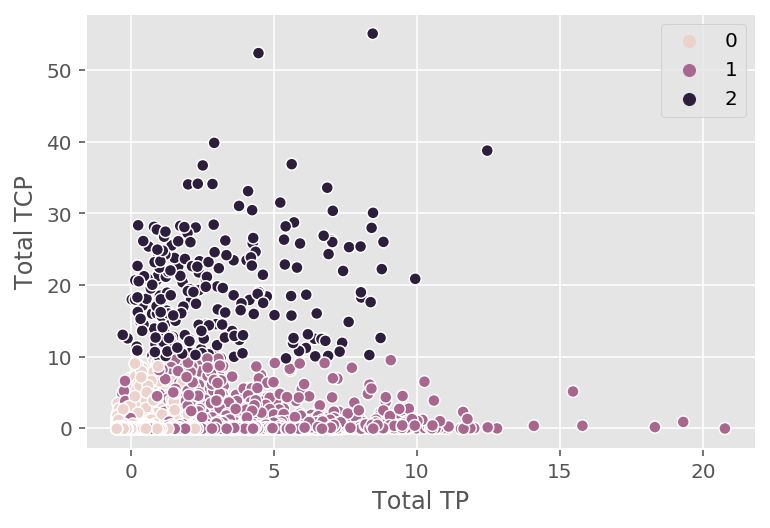

In [63]:
#plot the clusters
sns.scatterplot(x=norm_experience.iloc[:,2], y=norm_experience.iloc[:,0], hue=kmeans_exp.labels_, legend="full")

******************************

**Task 4** 

**Task 4. 1** - Write a python program to assign:
- a. engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) - (jupyter notebook )
from scipy.spatial import distance

- b. experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. - (jupyter notebook )

In [64]:
#compute each cluster mean to find the worst experienced cluster
print(norm_experience[norm_experience["cluster_exp"]==0].mean())
print(norm_experience[norm_experience["cluster_exp"]==1].mean())
print(norm_experience[norm_experience["cluster_exp"]==2].mean())

Total TCP      -0.059270
Total RTT      -0.041717
Total TP       -0.215430
Handset Type   -0.211811
cluster_exp     0.000000
dtype: float64
Total TCP       0.147077
Total RTT       0.420342
Total TP        2.139638
Handset Type    2.145007
cluster_exp     1.000000
dtype: float64
Total TCP       19.240803
Total RTT        0.337768
Total TP         3.038913
Handset Type     1.265853
cluster_exp      2.000000
dtype: float64


In [65]:
#compute each cluster mean to find the least engaged group
print(norm_engagement[norm_engagement["cluster_3k"]==0].mean())
print(norm_engagement[norm_engagement["cluster_3k"]==1].mean())
print(norm_engagement[norm_engagement["cluster_3k"]==2].mean())

Bearer Id       -0.454544
Dur. (ms).1     -0.231150
Total Traffic   -0.399280
cluster_3k       0.000000
dtype: float64
Bearer Id        3.730378
Dur. (ms).1      2.735181
Total Traffic    3.248806
cluster_3k       1.000000
dtype: float64
Bearer Id        0.976040
Dur. (ms).1      0.368548
Total Traffic    0.861646
cluster_3k       2.000000
dtype: float64


In [66]:
#Calculating Euclidean distance to get engagement and experience scores
satisfaction = pd.DataFrame()
satisfaction['eng_score'] = ((norm_engagement[["Bearer Id","Dur. (ms).1","Total Traffic"]] - np.array(engagement_centroids[1])).pow(2)).sum(1).pow(0.5)
satisfaction['exp_score'] = ((norm_experience[["Total TCP","Total RTT","Total TP","Handset Type"]] - np.array(experience_centroids[0])).pow(2)).sum(1).pow(0.5)

satisfaction

,eng_score,exp_score
MSISDN/Number,,
3.360100e+10,5.858625,0.405354
3.360100e+10,6.559248,0.411244
3.360100e+10,6.115277,0.427672
3.360101e+10,6.535453,0.391984
3.360101e+10,4.763609,1.433793
...,...,...
3.379000e+10,6.326947,0.294715
3.379000e+10,6.236439,0.407079
3.197021e+12,6.055709,0.429140


**Task 4.2** - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer - (jupyter notebook + slide )



In [67]:
#Taking the average of engagement and experience as a satisfaction score
satisfaction["satisfaction_score"] = (satisfaction['eng_score'] + satisfaction['exp_score'])/2
satisfaction.sort_values(by="satisfaction_score", ascending = False).head(10)

,eng_score,exp_score,satisfaction_score
MSISDN/Number,,,
3.366232e+10,6.472495,144.935759,75.704127
3.362578e+10,98.127268,20.128817,59.128042
3.366087e+10,4.405090,96.652393,50.528741
3.368369e+10,6.274959,81.943447,44.109203
3.361489e+10,54.033559,21.889576,37.961568
3.369855e+10,4.935705,68.734748,36.835227
3.362632e+10,48.220359,20.975672,34.598016
3.376054e+10,49.755133,17.603704,33.679419
3.366716e+10,45.214450,18.419432,31.816941


**Task 4.3** - Run a regression model of your choice to predict the satisfaction score of a customer. - (jupyter notebook)

In [68]:
#Using linear regression model to predict user satisfaction
model = LinearRegression()
inputs = satisfaction[["eng_score","exp_score"]]
target = satisfaction["satisfaction_score"]
model.fit(inputs,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#intercept and coefficients of the model z=ax + by +c
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)
print ('Predicted Satisfaction Score: ', model.predict([[10,8]]))

Intercept:  -4.440892098500626e-16
Coefficients:  [0.5 0.5]
Predicted Satisfaction Score:  [9.]


**Task 4.4** - Run a k-means (k=2) on the engagement & the experience score - (jupyter notebook). 

In [70]:
#running kmeans with k=2 to group users
kmeans_score = KMeans(n_clusters=2)
kmeans_score.fit(satisfaction[["eng_score","exp_score"]])
score_cluster = kmeans_score.predict(satisfaction[["eng_score","exp_score"]])
score_centroids = kmeans_score.cluster_centers_


In [71]:
#Assigning cluster to each user
satisfaction['score_cluster'] = score_cluster
satisfaction

,eng_score,exp_score,satisfaction_score,score_cluster
MSISDN/Number,,,,
3.360100e+10,5.858625,0.405354,3.131990,0
3.360100e+10,6.559248,0.411244,3.485246,0
3.360100e+10,6.115277,0.427672,3.271475,0
3.360101e+10,6.535453,0.391984,3.463719,0
3.360101e+10,4.763609,1.433793,3.098701,0
...,...,...,...,...
3.379000e+10,6.326947,0.294715,3.310831,0
3.379000e+10,6.236439,0.407079,3.321759,0
3.197021e+12,6.055709,0.429140,3.242424,0


**Task 4.5** - Aggregate the average satisfaction & experience score per cluster. - (jupyter notebook + slide)

In [72]:
#Average satisfaction and experience score of cluster 0
print("Cluster 0 average experience score",satisfaction[satisfaction['score_cluster']==0]["exp_score"].mean())
print("Cluster 0 average satisfaction score",satisfaction[satisfaction['score_cluster']==0]["satisfaction_score"].mean())

Cluster 0 average experience score 0.6911581033689378
Cluster 0 average satisfaction score 3.352948673872169


In [78]:
#Average satisfaction and experience score of cluster 1
print("Cluster 1 average experience score",satisfaction[satisfaction['score_cluster']==0]["exp_score"].mean())
print("Cluster 1 average satisfaction score",satisfaction[satisfaction['score_cluster']==0]["satisfaction_score"].mean())

Cluster 1 average experience score 0.6911581033689378
Cluster 1 average satisfaction score 3.352948673872169


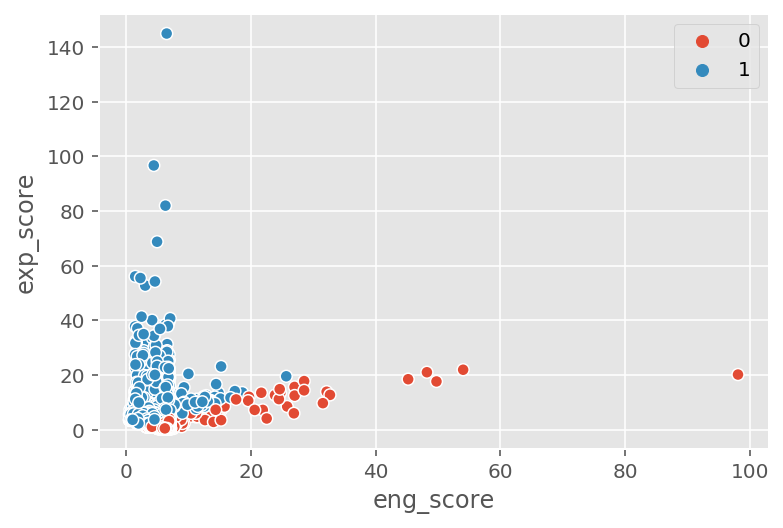

In [79]:
sns.scatterplot(x=satisfaction.iloc[:,0], y=satisfaction.iloc[:,1], hue=kmeans_score.labels_, legend="full")

**Task 4.6** - Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select on the exported table. (jupyter notebook + slide)


In [75]:
#subsetting the dataframe to export
export = satisfaction[["eng_score", "exp_score", "satisfaction_score"]]

In [76]:
#connecting to local dtabase and writing the dataframe
connection = sqlite3.connect('tellco.db')
export.to_sql(name = 'satisfaction', con = connection, if_exists = 'replace')
connection.close()

In [77]:
#Retrieving the dataframe from local database
connection = sqlite3.connect('tellco.db')
query_output = pd.read_sql('select "MSISDN/Number", '+
        '"satisfaction_score" from satisfaction', connection)
print(query_output)
connection.close()

        MSISDN/Number  satisfaction_score
0        3.360100e+10            3.131990
1        3.360100e+10            3.485246
2        3.360100e+10            3.271475
3        3.360101e+10            3.463719
4        3.360101e+10            3.098701
...               ...                 ...
106851   3.379000e+10            3.310831
106852   3.379000e+10            3.321759
106853   3.197021e+12            3.242424
106854   3.370000e+14            3.140776
106855   8.823971e+14            3.304694

[106856 rows x 2 columns]
